In [1]:
import numpy as np
import pandas as pd

In [2]:
# Gradient descent in Machine learning

In [3]:
from sklearn.datasets import make_regression 

In [4]:
X,y = make_regression(n_samples = 4, n_features=1, n_informative=1, n_targets=1 , noise=80, random_state=13)

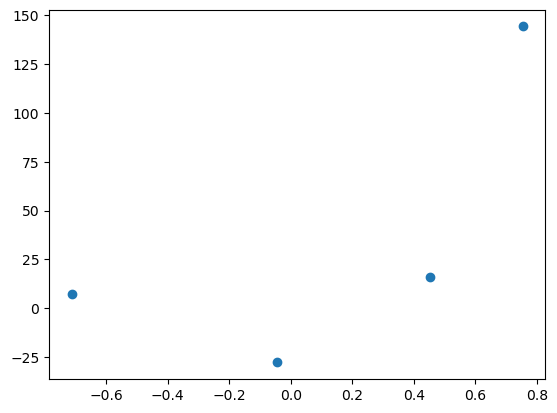

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [6]:
# let's apply ols
from sklearn.linear_model import LinearRegression

In [7]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [8]:
LinearRegression(copy_X = True , fit_intercept=True, n_jobs= None)

LinearRegression()

In [9]:
reg.coef_  #m slope

array([78.35063668])

In [10]:
reg.intercept_ #b

26.15963284313262

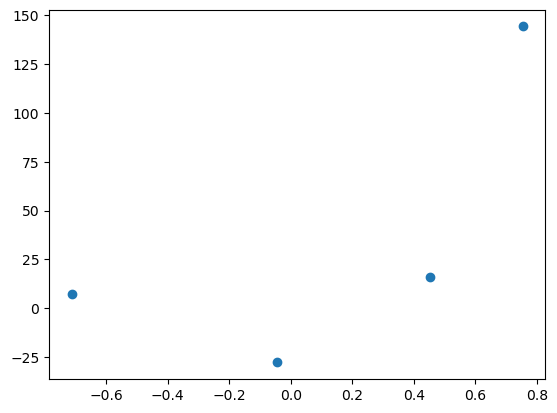

In [11]:
plt.scatter(X,y)

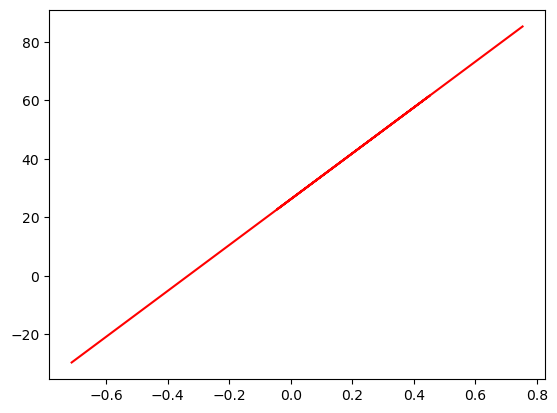

In [12]:
plt.plot(X, reg.predict(X), color='Red')

In [13]:
# let's apply gradient Descent assuming slope is constant = 78.35
# and let's assume the starting value for intercept b =0
y_pred = ((78.35*X)+0).reshape(4)

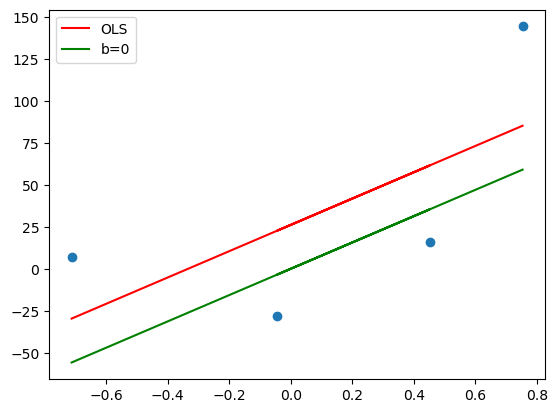

In [14]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='red', label ='OLS')
plt.plot(X,y_pred, color='green', label='b=0')
plt.legend()
plt.show()

In [15]:
m = 78.35
b =0
loss_slope= -2*np.sum(y- m*X.ravel()-b)
loss_slope

-209.27763408209216

In [16]:
# Let's take learning rate = 0.1
lr = 0.1
step_size= loss_slope*lr
step_size

-20.927763408209216

In [17]:
# calculating the new intercept
b = b-step_size
b

20.927763408209216

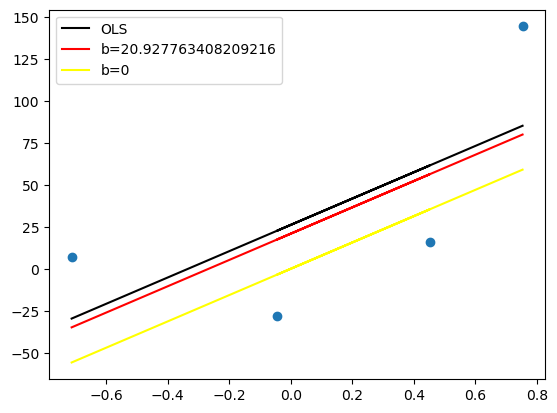

In [18]:
y_pred1 = ((78.35*X)+b).reshape(4)

plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='black', label='OLS')
plt.plot(X, y_pred1, color='red', label='b={}'.format(b))
plt.plot(X,y_pred, color='yellow', label='b=0')
plt.legend()
plt.show()

# Iteration -2

In [19]:
loss_slope = -2*np.sum(y-m*X.ravel()-b)
loss_slope

-41.85552681641843

In [20]:
step_size= loss_slope*lr
step_size

-4.185552681641844

In [21]:
b = b-step_size
b

25.11331608985106

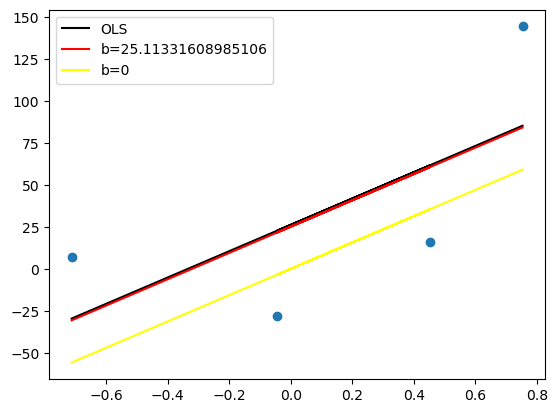

In [22]:
y_pred1 = ((78.35*X)+b).reshape(4)

plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='black', label='OLS')
plt.plot(X, y_pred1, color='red', label='b={}'.format(b))
plt.plot(X,y_pred, color='yellow', label='b=0')
plt.legend()
plt.show()

In [23]:
df = pd.read_csv('C:\\Users\\gajendra singh\\OneDrive\\Desktop\\pandas\\placement.csv')

In [24]:
df

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1
...,...,...,...
95,6.33,6.38,0
96,8.23,7.76,1
97,6.65,7.78,0
98,8.14,5.63,1


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [27]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

In [28]:
reg.coef_

array([78.35063668])

In [29]:
reg.intercept_

26.15963284313262

# Now we create Classof Gradient Descent for all data

In [30]:
from sklearn.datasets import make_regression 


In [31]:
import matplotlib.pyplot as plt

In [32]:
X,y = make_regression (n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)

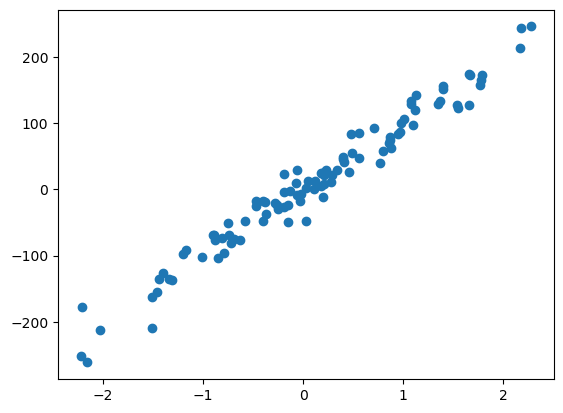

In [33]:
plt.scatter(X,y)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[99.75678635]
-0.34120750927059085


In [36]:
# m = 15.62

In [37]:
class GDRegressor:
        def __init__(self, learning_rate, epochs):
            self.m = 27.21
            self.b= 0 # starting
            self.lr=learning_rate
            self.epochs= epochs
        def fit(self,X,y):
            for i in range(self.epochs):
                loss_slope= -2*np.sum(y- self.m*X.ravel()-self.b)
                self.b= self.b -(self.lr*loss_slope)
            print(self.b)

In [38]:
gd = GDRegressor(0.001, 100) # checking Learning rate and epochs


In [39]:
gd.fit(X,y)

7.782136872934031


In [360]:
from sklearn.model_selection import cross_val_score

In [361]:
X,y =  make_regression (n_samples= 100, n_features=1, n_informative= 1, n_targets=1,noise=20, random_state=13)

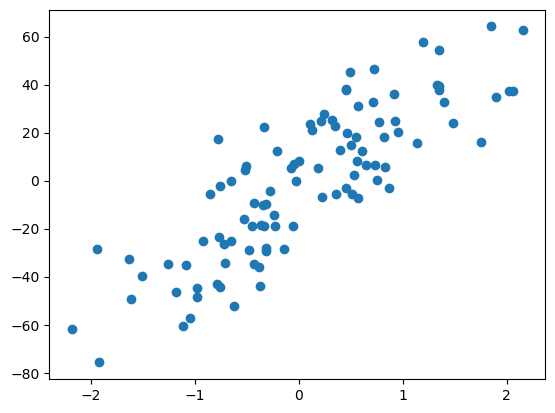

In [362]:
plt.scatter(X,y)

In [363]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [364]:
lr = LinearRegression()

In [365]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.271014426178382


In [366]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6345158782661013

In [367]:
class GDRegressor:
    def __init__(self, learning_rate, epochs):
        self.m= 100
        self.b= -120
        self.lr=learning_rate
        self.epochs=epochs
    def fit(self, X,y):
        for i in range(self.epochs):
            loss_slope_b = -2*np.sum(y-self.m*X.ravel()-self.b)
            loss_slope_m = -2*np.sum((y-self.m*X.ravel()- self.b)*X.ravel())
            
            self.b= self.b- (self.lr *loss_slope_b)
            self.m = self.m - (self.lr* loss_slope_m)
        print(self.b,self.m)
    def predict(self, X):
        return self.m *X+self.b

In [368]:
gd = GDRegressor(0.001, 100)

In [369]:
gd.fit(X_train,y_train)

-2.2710234077993587 28.12598618006269


In [370]:
# gd predict(X)

In [371]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.634515826773629

In [372]:
df.shape[1]

3

In [373]:
df.shape[0]

100

# SGD REGRESSION

In [374]:
from sklearn.datasets import load_diabetes

In [375]:
X,y = load_diabetes(return_X_y = True)
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [376]:
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [318]:
reg = LinearRegression()

In [319]:
reg.fit(X_train, y_train)

LinearRegression()

In [320]:
y_pred= reg.predict(X_test)
r2_score(y_test, y_pred)

0.4526027629719196

In [321]:
class SGDRegression :
    def __init__(self, learning_rate=0.01, epochs=100):
        self.coef_=None
        self.intercept_=None
        self.lr=learning_rate
        self.epochs= epochs
        
    def fit(self, X_train, y_train):
        self.intercept_=0
        self.coef_= np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            idx= np.random.randint(0, X_train.shape[0])
            
            y_hat = np.dot(X_train[idx], self.coef_)+ self.intercept_
            
            intercept_der= -2*(y_train[idx] -y_hat)
            self.intercept_ = self.intercept_ - (self.lr*intercept_der)
            
            coef_der =-2*np.dot((y_train[idx]-y_hat),X_train[idx])
            self.coef_= self.coef_-(self.lr*coef_der)
        print(self.intercept_, self.coef_)
    def predict(self , X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [322]:
# np.random.randint(0,X_train.shape[0])

In [323]:
#X_train[48]

In [324]:
sgd= SGDRegression(learning_rate=0.1, epochs=200)

In [325]:
sgd.fit(X_train, y_train)

145.7892870465722 [ 12.84549866  -5.37276206  63.67951744  68.61592564  27.14020624
  25.20169692 -53.85992859  61.40574559  67.02823217  53.00465582]


In [326]:
y_pred = sgd.predict(X_test)

In [327]:
r2_score(y_test, y_pred)

0.2028970320676352

In [328]:
 X,y = load_diabetes(return_X_y=True)

In [329]:
print(X.shape)

(442, 10)


In [330]:
print(y.shape)

(442,)


In [331]:
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [332]:
lr = LinearRegression()

In [333]:
lr.fit(X_train,y_train)

LinearRegression()

In [334]:
print(lr.coef_)
print(lr.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [335]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.4399338661568968

# mini batch gradient descent

In [336]:
import random
class MBSDRegressor:
    def __init__(self,batch_size, learning_rate=0.01, epochs=100):
        self.coef_=None
        self.intercept_=None
        self.lr=learning_rate
        self.epochs= epochs
        self.batch_size = batch_size
    def fit(self, X_train, y_train):
        self.intercept_=0
        self.coef_=np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            for j in range(int(X_train.shape[0]/self.batch_size)):
                
                idx = random.sample(range(X_train.shape[0]), self.batch_size)
                
                y_hat = np.dot(X_train[idx],self.coef_)+self.intercept_
                
                intercept_der = -2* np.mean(y_train[idx]-y_hat)
                self.intercept_=self.intercept_-(self.lr*intercept_der)
                
                coef_der = -2* np.dot((y_train[idx]- y_hat),X_train[idx])
                self.coef_= self.coef_-(self.lr*coef_der)
        print(self.intercept_,self.coef_)
            
    def predict(self, X_test):
        return np.dot(X_test, self.coef_)+self.intercept_

In [337]:
X_train[[10,36,23,39,96,65,90,15,73]].shape

(9, 10)

In [338]:
mbr=MBSDRegressor(batch_size=int(X_train.shape[0]/10), learning_rate=0.01,epochs=50)

In [339]:
mbr.fit(X_train, y_train)

151.90190304862628 [  59.51737355  -56.71321758  356.54910181  246.16749425   20.00440596
  -29.67551146 -168.442827    126.93014294  322.63993504  130.21134514]


In [340]:
X_train.shape

(353, 10)

In [341]:
print(mbr.coef_)
print(mbr.intercept_)

[  59.51737355  -56.71321758  356.54910181  246.16749425   20.00440596
  -29.67551146 -168.442827    126.93014294  322.63993504  130.21134514]
151.90190304862628


In [342]:
y_pred = mbr.predict(X_test)
r2_score(y_test, y_pred)

0.43129434715133286